## Project Objective - Building a regression model on Air BNB data to predict homestay price.

In [82]:
# importing Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
import matplotlib.style 

In [146]:
df = pd.read_excel('Air_Bnb.xlsx')

In [147]:
df.sample(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
25597,6038028,Entire home/apt,4.0,1.0,moderate,1.0,t,96.0,2.0,2.0,5.087596
14436,2771128,Entire home/apt,6.0,2.0,strict,1.0,f,95.0,2.0,2.0,4.828314
39175,8101297,Entire home/apt,3.0,1.0,strict,1.0,f,80.0,1.0,1.0,5.010635
70781,4302952,Private room,2.0,1.0,moderate,1.0,t,89.0,1.0,1.0,4.094345
23050,7898757,Private room,2.0,1.0,flexible,0.0,t,NaN,1.0,2.0,4.094345
61542,2295809,Entire home/apt,4.0,1.0,flexible,1.0,t,93.0,1.0,2.0,4.700480
36930,15273279,Private room,2.0,2.0,moderate,1.0,f,93.0,1.0,1.0,4.543295
55551,4803750,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.094345
11075,16548856,Entire home/apt,3.0,1.0,moderate,1.0,f,90.0,0.0,2.0,4.499810
48788,14615791,Entire home/apt,5.0,1.0,strict,1.0,f,98.0,2.0,2.0,5.192957


#### There is no use of id column and this column can affect model accuracy

In [148]:
df.drop(columns = 'id', inplace=True)

In [149]:
df.shape

(74111, 10)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


#### As we can see, almost every column has null values. review_scores_rating column has most number of null values

In [151]:
df.describe(include='all')

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107.000000,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,NaN,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,NaN,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,0.734060,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,0.441835,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,0.000000,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,0.000000,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,1.000000,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,1.000000,NaN,100.000000,1.000000,2.000000,5.220356


In [152]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [153]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.title(), ':', df[column].nunique(), '\n\n', df[column].value_counts(), '\n\n')

Room_Type : 3 

 room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64 


Cancellation_Policy : 3 

 cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64 


Instant_Bookable : 2 

 instant_bookable
f    54660
t    19451
Name: count, dtype: int64 




In [154]:
df.duplicated().sum()

19994

In [155]:
df1 = df.copy()

In [156]:
df1.drop_duplicates(inplace=True)

In [159]:
df1.shape

(54117, 10)

### Encoding categorical variables, bcz we can pass categorical data directly to model

In [165]:
df1 = pd.get_dummies(df1,columns = ['room_type','cancellation_policy','instant_bookable'], dtype=int)

In [166]:
df1.sample(20)

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_f,instant_bookable_t
68319,4.0,1.0,1.0,80.0,1.0,2.0,4.605170,1,0,0,0,1,0,0,1
22508,7.0,2.5,1.0,NaN,3.0,4.0,6.684612,1,0,0,0,1,0,0,1
27302,4.0,1.0,1.0,95.0,1.0,3.0,4.927254,1,0,0,0,0,1,1,0
69446,11.0,2.5,1.0,96.0,4.0,8.0,5.697093,1,0,0,0,0,1,1,0
68698,9.0,3.0,1.0,98.0,3.0,3.0,5.293305,1,0,0,0,0,1,0,1
51813,3.0,1.0,1.0,94.0,1.0,1.0,5.616771,1,0,0,0,1,0,1,0
1245,4.0,1.0,1.0,86.0,2.0,2.0,4.828314,1,0,0,1,0,0,1,0
17687,4.0,1.0,1.0,91.0,1.0,2.0,4.174387,0,1,0,0,0,1,0,1
20626,8.0,2.5,1.0,100.0,3.0,4.0,6.396930,1,0,0,0,1,0,0,1
73783,2.0,1.0,1.0,60.0,1.0,2.0,4.488636,1,0,0,0,1,0,1,0


### Null Values Treatment

In [167]:
df1.isnull().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_f                  0
instant_bookable_t                  0
dtype: int64

Now we can either replace null values by using central tendencies or KNN imputer.    
But we donot know yet which method will work good for model's accuracy.   
let's create different databases using different filling methods 

#### Replacing null values by mean

In [168]:
df_mean = df1.copy()
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [171]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54117 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54117 non-null  float64
 1   bathrooms                     54117 non-null  float64
 2   cleaning_fee                  54117 non-null  float64
 3   review_scores_rating          54117 non-null  float64
 4   bedrooms                      54117 non-null  float64
 5   beds                          54117 non-null  float64
 6   log_price                     54117 non-null  float64
 7   room_type_Entire home/apt     54117 non-null  int64  
 8   room_type_Private room        54117 non-null  int64  
 9   room_type_Shared room         54117 non-null  int64  
 10  cancellation_policy_flexible  54117 non-null  int64  
 11  cancellation_policy_moderate  54117 non-null  int64  
 12  cancellation_policy_strict    54117 non-null  int64  
 13  instan

#### Replacing null values by median 

In [172]:
df_median = df1.copy()
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_median[column].median()
        df_median[column] = df_median[column].fillna(median)

#### Using KNN Imputer 

In [177]:
df_knn = df1.copy()

In [178]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54117 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54114 non-null  float64
 1   bathrooms                     53922 non-null  float64
 2   cleaning_fee                  54113 non-null  float64
 3   review_scores_rating          43902 non-null  float64
 4   bedrooms                      54025 non-null  float64
 5   beds                          53992 non-null  float64
 6   log_price                     54117 non-null  float64
 7   room_type_Entire home/apt     54117 non-null  int64  
 8   room_type_Private room        54117 non-null  int64  
 9   room_type_Shared room         54117 non-null  int64  
 10  cancellation_policy_flexible  54117 non-null  int64  
 11  cancellation_policy_moderate  54117 non-null  int64  
 12  cancellation_policy_strict    54117 non-null  int64  
 13  instan

In [180]:
df_knn[df_knn['cleaning_fee'].isna()]

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_f,instant_bookable_t
205,2.0,1.0,NaN,96.0,1.0,1.0,4.584967,0,1,0,0,0,0,0,1
209,2.0,1.0,NaN,93.0,1.0,1.0,4.787492,1,0,0,0,0,0,1,0
232,2.0,1.0,NaN,100.0,1.0,1.0,5.298317,1,0,0,0,0,0,1,0
399,2.0,1.0,NaN,100.0,1.0,1.0,5.703782,1,0,0,0,0,0,0,1


In [181]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df1)
df_knn = pd.DataFrame(data = df_imputed, columns = df1.columns)

In [193]:
df1.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'instant_bookable_f',
       'instant_bookable_t'],
      dtype='object')

In [198]:
num = ['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price']

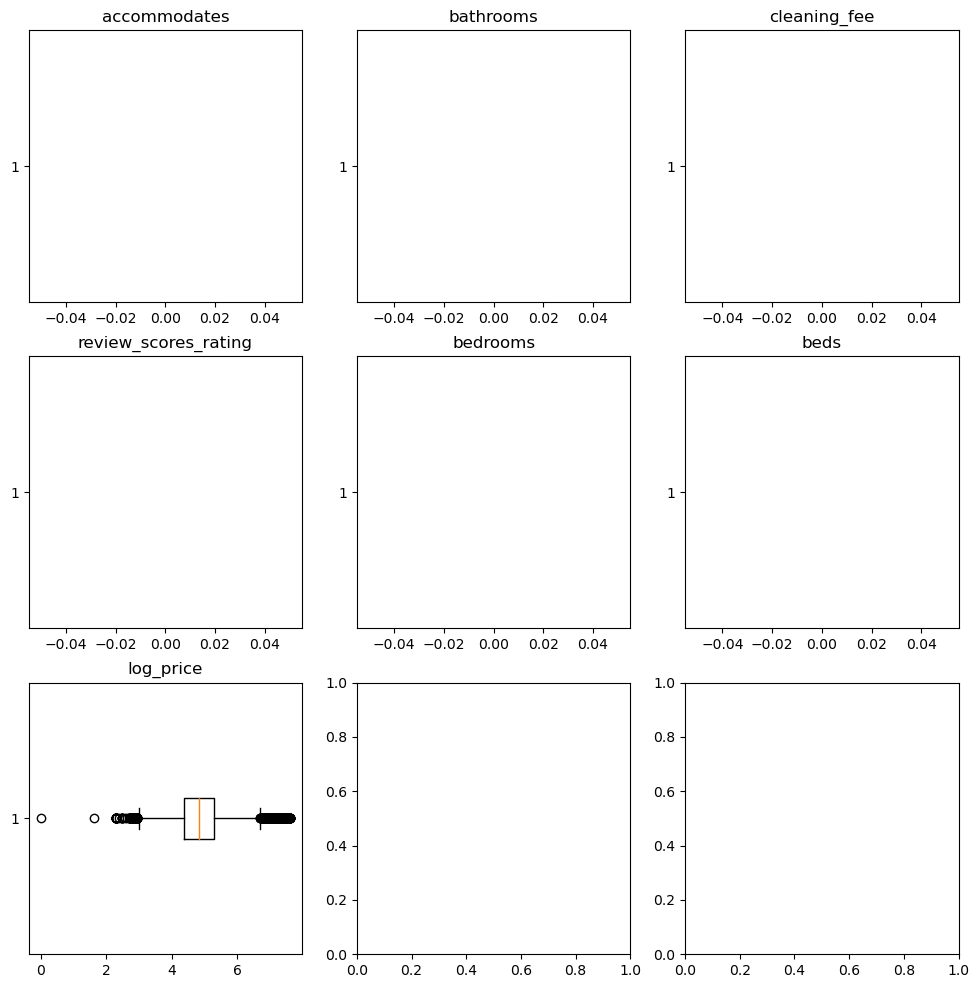

In [208]:
fig, ax = plt.subplots(3, 3, figsize = (12, 12))

for i, col in enumerate(num):
    r, c = divmod(i, 3)
    ax[r, c].boxplot(data = df1, x = col, vert = 0)
    ax[r, c].set_title(col)
plt.show()

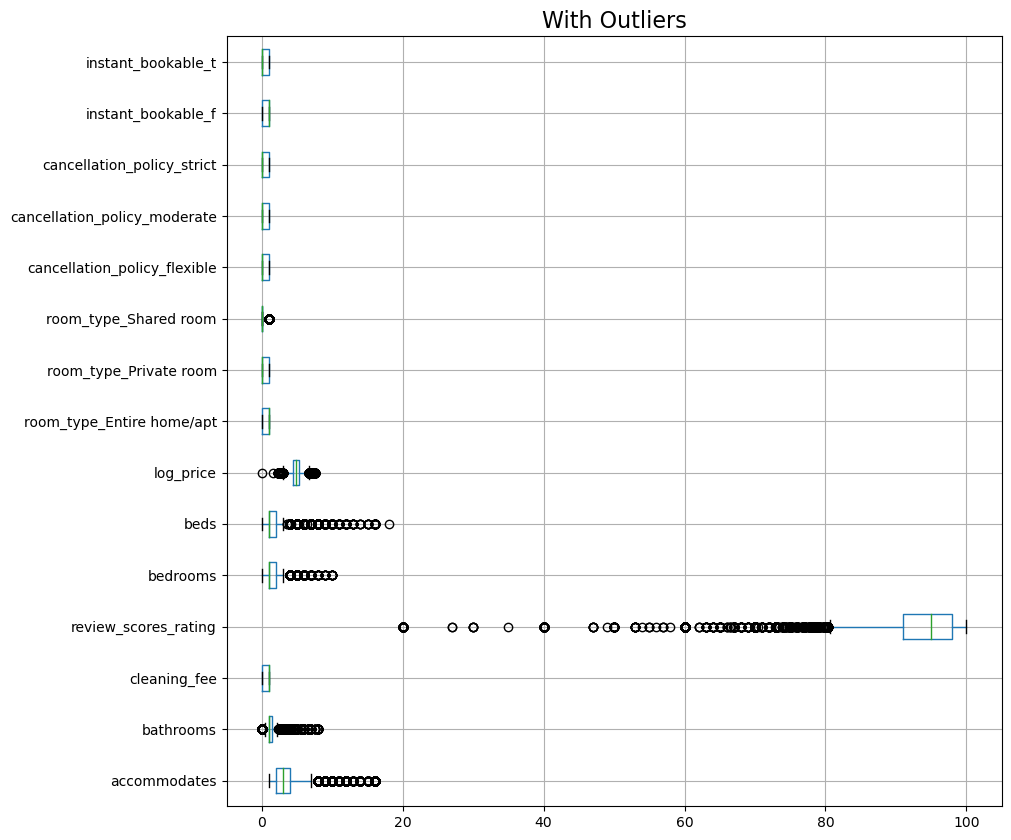

In [211]:
cont=df_knn.dtypes[(df_knn.dtypes!=int) & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [219]:
df1[df1['beds'] > 10]

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_f,instant_bookable_t
1052,1.0,2.0,0.0,94.0,1.0,16.0,3.912023,0,0,1,0,0,1,0,1
1453,4.0,2.0,0.0,20.0,5.0,13.0,5.703782,0,1,0,0,0,1,1,0
1746,16.0,1.0,1.0,97.0,1.0,13.0,5.010635,1,0,0,0,0,1,0,1
1981,14.0,5.5,1.0,NaN,5.0,12.0,7.277939,1,0,0,0,1,0,0,1
2195,16.0,3.5,1.0,94.0,7.0,12.0,5.913503,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69612,16.0,4.0,1.0,80.0,8.0,12.0,6.129050,1,0,0,1,0,0,0,1
70040,11.0,2.0,1.0,60.0,2.0,11.0,5.700444,1,0,0,0,0,1,0,1
71470,13.0,2.0,0.0,93.0,3.0,12.0,5.991465,1,0,0,1,0,0,1,0
72113,16.0,2.5,1.0,90.0,1.0,15.0,3.401197,0,0,1,1,0,0,0,1
